# Step-to -step time evolution:
## Floquet operator:

\begin{equation}
\hat{F} = \int e^{-i\hat{H(t)}}dt
\end{equation}


\begin{equation}
\hat{F} = \exp\left({\frac{-i\tau_z \hat{J_z}^2}{2j+1}-i\alpha_z \hat{J}_z}\right) \times \exp\left({-i\alpha_y \hat{J}_y}\right)
\end{equation}

Where $\tau_z$, $\alpha_z$ and $\alpha_y$ are paramiters $j$ is the absolute value of angular momentum $\hat{J}_y $

In [211]:
import numpy as np
from scipy.linalg import expm
from cmath import polar, phase
import matplotlib.pyplot as plt

In [157]:
# caothic constant
tau_z = .1

#parameters
alpha_y = 1
alpha_z = 1

#dimansions
j = 1
N = 2*j +1
m_list = np.array([i for i in range(-j,j+1)])

In [158]:
F_z = np.zeros([N,N],dtype=complex)

In [190]:
for i in range(N):
    F_z[i,i] = np.exp((-1j)*(tau_z*j*(j+1)/(N) + alpha_z*m_list[i]))
   

In [191]:
J_p = np.zeros([N,N],dtype=complex)
J_m = np.zeros([N,N],dtype=complex)
J_y = np.zeros([N,N],dtype=complex)

for n in m_list:
    for m in m_list:
        if (n == m+1):
            J_p [np.where(m_list == n),np.where(m_list == m)] = np.sqrt(j*(j+1) - m*(m+1))
        if (n == m-1):
            J_m [np.where(m_list == n ),np.where(m_list==m)] = np.sqrt(j*(j+1) - m*(m-1))
            
J_y = (J_p - J_m)*(complex(0,-1))

In [192]:
F_y = expm(alpha_y*(-1j)*J_y)
F = np.matmul(F_z,F_y)
F_ = np.linalg.inv(F)
test = np.matmul(F,F_)
test

array([[ 1.00000000e+00+0.00000000e+00j, -4.54626158e-17-2.08938234e-17j,
         8.87301952e-18-7.78449443e-17j],
       [-8.92399740e-17+1.80142610e-16j,  1.00000000e+00-2.77555756e-17j,
         4.61464986e-17-6.14469736e-17j],
       [ 4.85903355e-17+1.68230921e-17j, -1.95112981e-17+2.05308088e-17j,
         1.00000000e+00+5.55111512e-17j]])

In [193]:
F
a = np.linalg.eigvals(J_y)
b = [polar(a[i]) for i in range(len(eigenvals))]
b

[(1.9999999999999976, 0.0),
 (2.3877453108728004e-16, 0.0),
 (1.9999999999999998, 3.141592653589793)]

In [197]:
eigenvals = np.linalg.eigvals(F)
phi_list = [phase(eigenvals[i]) for i in range(len(eigenvals))]


In [198]:
phi_list

[-0.06666666666666642, 2.0869068224662626, -2.2202401557995954]

In [312]:
def step_evolution_matrix_eigenvals(j_0, tau_z_0,alpha_y_0=1,alpha_z_0=1):
    import numpy as np
    from scipy.linalg import expm
    from cmath import polar, phase
    import matplotlib.pyplot as plt
    
    # caothic constant
    tau_z = tau_z_0

    #parameters
    alpha_y = alpha_y_0
    alpha_z = alpha_z_0

    #dimansions
    j = j_0
    N = 2*j +1
    m_list = np.array([i for i in range(-j,j+1)])
    
    #construct F_z
    
    F_z = np.zeros([N,N],dtype=complex)
    for i in range(N):
        F_z[i,i] = np.exp((-1j)*(tau_z*m_list[i]*m_list[i]/(N) + alpha_z*m_list[i]))
   
    #construct F_y
    J_p = np.zeros([N,N],dtype=complex)
    J_m = np.zeros([N,N],dtype=complex)
    J_y = np.zeros([N,N],dtype=complex)

    for n in m_list:
        for m in m_list:
            if (n == m+1):
                J_p [np.where(m_list == n),np.where(m_list == m)] = np.sqrt(j*(j+1) - m*(m+1))
            if (n == m-1):
                J_m [np.where(m_list == n ),np.where(m_list==m)] = np.sqrt(j*(j+1) - m*(m-1))
            
    J_y = (J_p - J_m)*(-1j)/2
    
    F_y = expm(alpha_y*(-1j)*J_y)
    
    #construct F
    F = np.matmul(F_z,F_y)
    
    #find its eigenvauls
    eigenvals = np.linalg.eigvals(F)
    phi_list = np.sort(np.array([np.angle(eigenvals[i]) for i in range(len(eigenvals))]))
    
    return (phi_list)

In [313]:
a = step_evolution_matrix_eigenvals(1000,.1)
a

array([-3.14029008, -3.13787038, -3.134882  , ...,  3.1342366 ,
        3.13819641,  3.13905226])

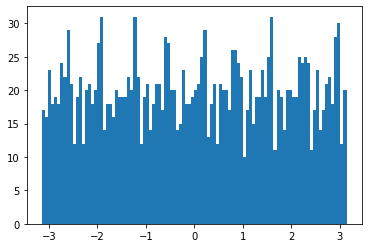

In [314]:
plt.hist(a, bins=100)
plt.show()

In [223]:
a

array([-3.14046992, -3.14035046, -3.13279254, ...,  3.1274801 ,
        3.13503802,  3.13515747])

In [315]:
phi_diff = np.array([(a[i+1] - a[i]) for i in range(len(a)-1)])
phi_diff

array([0.0024197 , 0.00298838, 0.0014527 , ..., 0.00354921, 0.00395981,
       0.00085585])

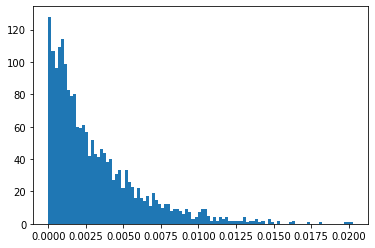

In [316]:
plt.hist(phi_diff,bins=100)
plt.show()

# Caothic case

In [275]:
a = np.sort(step_evolution_matrix_eigenvals(1000,10))
phi_diff = np.array([(a[i+1] - a[i]) for i in range(len(a)-1)])

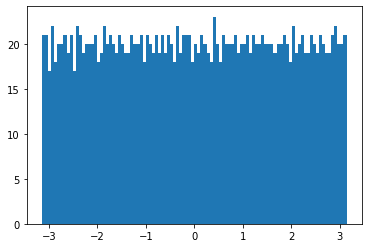

In [276]:
plt.hist(a, bins=100)
plt.show()

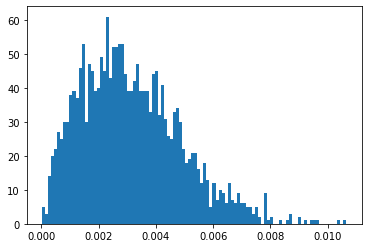

In [278]:
plt.hist(phi_diff,bins=100)
plt.show()

# Random Diagonal Floquet

In [344]:
phi_list = np.sort(np.random.random(1000)*np.pi)
phi_diff = np.array([(phi_list[i+1] - phi_list[i]) for i in range(len(F)-1)])

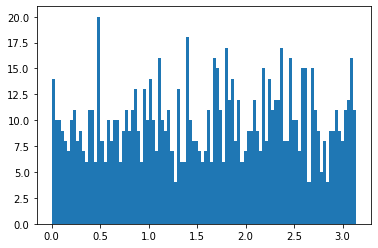

In [345]:
plt.hist(phi_list,bins=100)
plt.show()

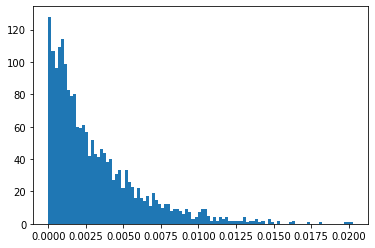

In [317]:
phi_diff
plt.hist(phi_diff,bins=100)
plt.show()

# Random Full Floquet

In [322]:
from scipy.stats import unitary_group

In [339]:
F = unitary_group.rvs(1000)
eigenvals = np.linalg.eigvals(F)
phi_list = np.sort(np.array([np.angle(eigenvals[i]) for i in range(len(eigenvals))]))
phi_diff = np.array([(phi_list[i+1] - phi_list[i]) for i in range(len(F)-1)])

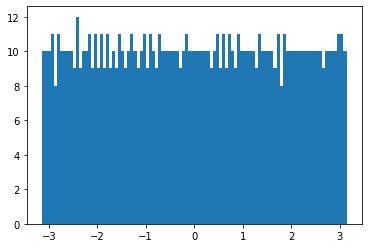

In [340]:
plt.hist(phi_list, bins=100)
plt.show()

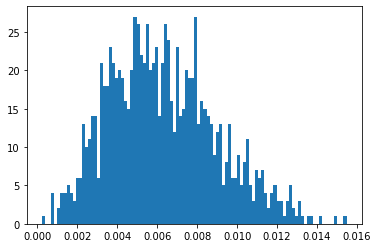

In [341]:
plt.hist(phi_diff,bins=100)
plt.show()

# Normalized Difference

## Small $\tau_z$

In [455]:
j = 1000
a = step_evolution_matrix_eigenvals(j,.1)

In [456]:
phi_diff = np.array([(a[i+1] - a[i]) for i in range(len(a)-1)])
phi_diff_bar = np.array([(a[i+1] - a[i])/(2*np.pi/(2*j+1)) for i in range(len(a)-1)])

### Diff

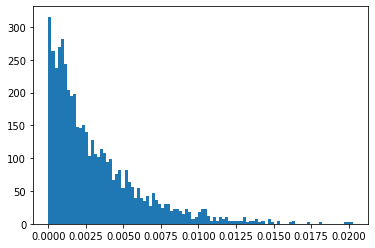

In [457]:
plt.hist(phi_diff,bins=100, density=True)
plt.show()

### Diff bar

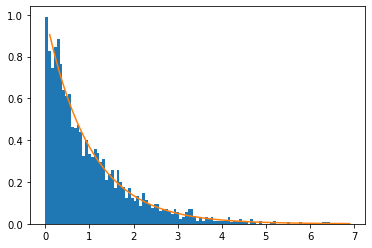

In [458]:
alpha = 1
x = np.array([i for i in np.arange(0.1,7,.1)])
y = np.exp(-x/alpha)

plt.hist(phi_diff_bar,bins=100, density=True)
plt.plot(x,y,'-')
plt.show()

### Big $\tau_z$

In [459]:
j = 1000
a = step_evolution_matrix_eigenvals(j,10)

In [460]:
phi_diff = np.array([(a[i+1] - a[i]) for i in range(len(a)-1)])
phi_diff_bar = np.array([(a[i+1] - a[i])/(2*np.pi/(2*j+1)) for i in range(len(a)-1)])

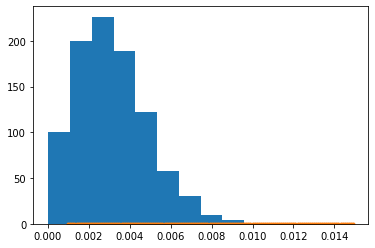

In [461]:
pi = np.pi
u = 1
x = np.array([i for i in np.arange(0.001,.015,.0001)])
y = (pi*x)*np.exp(-pi*x*x/u)/2

plt.hist(phi_diff, density=1)
plt.plot(x,y,'.')
plt.show()

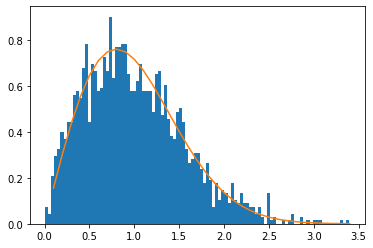

In [476]:
pi = np.pi
u = 4
x = np.array([i for i in np.arange(0.1,3.5,.1)])
y = (pi*x)*np.exp(-pi*x*x/u)/2

plt.hist(phi_diff_bar, bins=100, density=True)
plt.plot(x,y,'-')
plt.show()